In [1]:
#James Gibson
#12/03/22
#Script is based on https://www.geeksforgeeks.org/random-forest-regression-in-python/

#Error warning about tensorflow

#2022-12-03 17:53:16.980823: I tensorflow/core/platform/cpu_feature_guard.cc:193] 
#This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use 
#the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
#To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

2022-12-05 11:57:43.385562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#Loading my data set (except for 2021 data)
data = r'/Users/bustergibson/documents/ml/pm25_aod_complete.csv'
dataset = pd.read_csv(data)
dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]
dataset = dataset[dataset['YEAR'] < 2021]
dataset = dataset[['SITE_LATITUDE','SITE_LONGITUDE','YEAR','PM25','AOD']]
dataset

,SITE_LATITUDE,SITE_LONGITUDE,YEAR,PM25,AOD
0,41.170833,-73.194722,2010,8.747368,0.106736
1,41.399167,-73.443056,2010,9.161345,0.073683
2,41.784722,-72.631667,2010,7.658380,0.115273
3,41.821342,-73.297257,2010,5.436066,0.104100
4,41.301400,-72.902871,2010,8.927290,0.081273
...,...,...,...,...,...
1095,41.874668,-71.379971,2020,8.146875,0.077750
1096,41.841039,-71.360970,2020,6.500000,0.077750
1097,42.887590,-73.249840,2020,5.616667,0.112200
1098,44.528390,-72.868840,2020,3.840375,0.100989


In [4]:
#Create training and test data sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [5]:
#Create copies
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#Remove PM 2.5 because this is the variable we are trying to predict
train_labels = train_features.pop('PM25')
test_labels = test_features.pop('PM25')

train_features

,SITE_LATITUDE,SITE_LONGITUDE,YEAR,AOD
395,41.874668,-71.379971,2013,0.117727
860,40.580270,-74.198320,2018,0.121792
477,40.535278,-78.370833,2014,0.037880
671,40.617488,-79.727664,2016,0.091262
1002,41.784722,-72.631667,2020,0.091688
...,...,...,...,...
421,43.566122,-71.496335,2014,0.073822
694,41.807469,-71.412968,2016,0.098667
138,40.924580,-75.067815,2011,0.103916
212,41.685707,-71.169235,2012,0.176263


In [6]:
regressor = RandomForestRegressor(n_estimators = 500,criterion="absolute_error")

In [7]:
regressor.fit(train_features, train_labels)  

RandomForestRegressor(criterion='absolute_error', n_estimators=500)

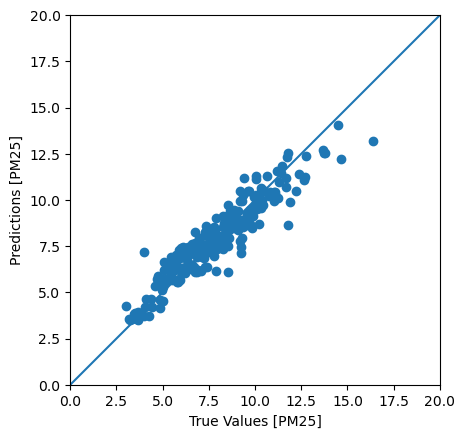

In [8]:
plt.clf()
test_predictions = regressor.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [PM25]')
plt.ylabel('Predictions [PM25]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


plt.show()

In [9]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, test_predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, test_predictions))

Mean Absolute Error (MAE): 0.6731968811077175
Mean Squared Error (MSE): 0.7593904270254156


In [10]:
#Get 2021 Data
data = r'/Users/bustergibson/documents/ml/pm25_aod_complete.csv'
dataset = pd.read_csv(data)
dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]
dataset = dataset[dataset['YEAR'] == 2021]
dataset_2021 = dataset[['SITE_LATITUDE','SITE_LONGITUDE','YEAR','PM25','AOD']]
dataset_2021

,SITE_LATITUDE,SITE_LONGITUDE,YEAR,PM25,AOD
1100,41.170833,-73.194722,2021,8.133412,0.110507
1101,41.399167,-73.443056,2021,7.969359,0.128051
1102,41.784722,-72.631667,2021,8.001950,0.151212
1103,41.821342,-73.297257,2021,5.620872,0.212200
1104,41.301400,-72.902871,2021,7.798128,0.139341
...,...,...,...,...,...
1195,41.874668,-71.379971,2021,9.533728,0.128818
1196,41.841039,-71.360970,2021,7.125214,0.128818
1197,42.887590,-73.249840,2021,6.109695,0.125900
1198,44.528390,-72.868840,2021,4.380475,0.087533


In [11]:
#Create copies

features_2021 = dataset_2021.copy()

#Remove PM 2.5 because this is the variable we are trying to predict

labels_2021 = features_2021.pop('PM25')




features_2021

,SITE_LATITUDE,SITE_LONGITUDE,YEAR,AOD
1100,41.170833,-73.194722,2021,0.110507
1101,41.399167,-73.443056,2021,0.128051
1102,41.784722,-72.631667,2021,0.151212
1103,41.821342,-73.297257,2021,0.212200
1104,41.301400,-72.902871,2021,0.139341
...,...,...,...,...
1195,41.874668,-71.379971,2021,0.128818
1196,41.841039,-71.360970,2021,0.128818
1197,42.887590,-73.249840,2021,0.125900
1198,44.528390,-72.868840,2021,0.087533


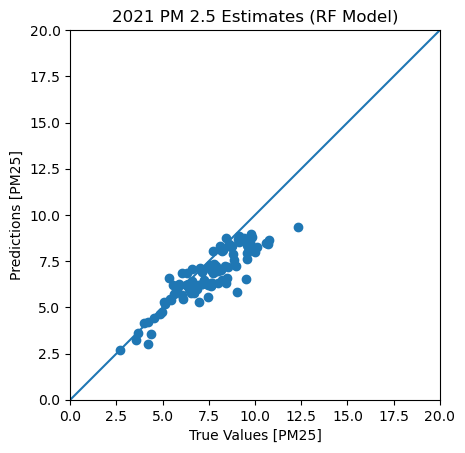

In [12]:
plt.clf()
predictions_2021 = regressor.predict(features_2021).flatten()

a = plt.axes(aspect='equal')
plt.scatter(labels_2021, predictions_2021)
plt.xlabel('True Values [PM25]')
plt.ylabel('Predictions [PM25]')
plt.title('2021 PM 2.5 Estimates (RF Model)')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


plt.show()

In [13]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(labels_2021, predictions_2021))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(labels_2021, predictions_2021))

Mean Absolute Error (MAE): 0.8484847998844475
Mean Squared Error (MSE): 1.2415889122488317


In [14]:
epa_csv = r'/Users/bustergibson/documents/ml/EPA_CBSA_2021_Data_w_AOD.csv'
epa_df = pd.read_csv(epa_csv)
epa_df['YEAR'] = '2021'
epa_df = epa_df.loc[:, ~epa_df.columns.str.contains('^Unnamed')]


#Create a copy

epa_df_copy = epa_df[['LAT','LONG','YEAR','AOD']]
epa_df_copy = epa_df_copy.rename(columns={"LAT": "SITE_LATITUDE", "LONG": "SITE_LONGITUDE"})
epa_df_copy

,SITE_LATITUDE,SITE_LONGITUDE,YEAR,AOD
0,42.763600,-73.653600,2021,0.122132
1,40.729200,-75.247900,2021,0.131273
2,40.518700,-78.394700,2021,0.078005
3,39.500061,-74.627040,2021,0.113250
4,44.449900,-69.703800,2021,0.118508
5,44.801600,-68.771200,2021,0.112329
6,42.878100,-73.196800,2021,0.093333
7,42.360100,-71.058800,2021,0.114851
8,41.256000,-73.370900,2021,0.086473
9,42.851800,-78.747600,2021,0.225875


In [15]:
predictions_epa = regressor.predict(epa_df_copy).flatten()
predictions_epa

array([5.6268875 , 8.05066728, 7.89812939, 6.10708959, 3.2823328 ,
       3.69156105, 6.14603399, 6.23654105, 7.10241198, 6.8769806 ,
       3.59338381, 5.63546697, 5.38686199, 8.72343558, 6.66693088,
       8.27138691, 6.0032483 , 8.09222842, 6.9299629 , 8.2370984 ,
       5.53458913, 4.66868627, 8.73958688, 8.53909263, 2.65685899,
       4.46439953, 7.14582083, 7.07588692, 6.48375538, 8.51975425,
       8.99635942, 6.00868608, 6.24907747, 6.12136416, 8.39134025,
       6.30418858, 6.17545092, 5.60943432, 7.48074038, 5.74396069,
       8.08236268, 5.99975018, 6.23894596, 7.435136  , 5.48659428,
       8.55151119, 8.35338979])

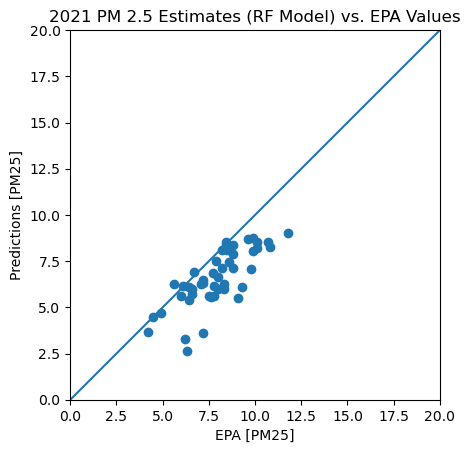

In [16]:
#Comaring to EPA city estimates
plt.clf()
predictions_2021_epa = predictions_epa.flatten()
labels_2021_epa = epa_df['EPA_PM25']
a = plt.axes(aspect='equal')
plt.scatter(labels_2021_epa, predictions_2021_epa)
plt.xlabel('EPA [PM25]')
plt.ylabel('Predictions [PM25]')
plt.title('2021 PM 2.5 Estimates (RF Model) vs. EPA Values')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


plt.show()

In [17]:
epa_df['PM25 Predicted'] = predictions_epa
epa_df.to_csv(r'/Users/bustergibson/documents/ml/EPA_RF_Results.csv')